## Regresión polinomial

### a) Una única variable

##### 1) Importar librerías

In [12]:
!pip install plotly
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Defaulting to user installation because normal site-packages is not writeable


##### 2) Crear los datos y visualizarlos

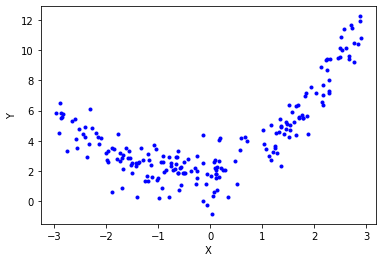

In [13]:
#Generamos los datos de entrada
X = 6 * np.random.rand(200,1) - 3
#La ecuación que vamos a usar y que tenemos que predecir a través de regresión es: y = 0.8x^2 + 0.9x + 2
# Creamos la ecuación más ruido
y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200,1)
#Visualizamos los datos
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

##### 3) Dividir los datos en set de entrenamiento y set de test

In [6]:
#Un 80% de los datos es de entrenamiento y el 20% restante de test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [19]:
type(X)


#x_train

numpy.ndarray

##### 4) Aplicamos regresión lineal

In [9]:
#Creamos variable de regresión lineal
lr = LinearRegression()
# Buscamos los parámetros óptimos del modelo
lr.fit(x_train, y_train)
#Predecimos las variables de salida
y_pred = lr.predict(x_test)

##### 5) Dibujamos los datos de entrenamiento y el modelo de regresión lineal

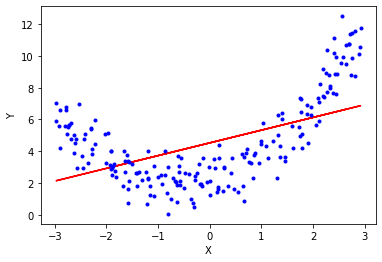

In [10]:
plt.plot(x_train, lr.predict(x_train), color="r")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

##### 6) Aplicamos regresión polinomial

In [11]:
#Aplicamos regresión polinomial de 2º grado
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)

In [55]:
# Vemos los valores del modelo (los coeficientes de la variable dependiente y el punto de intersección)
print(lr.coef_)
print(lr.intercept_)

[[0.         0.9086455  0.80077667]]
[1.92776429]


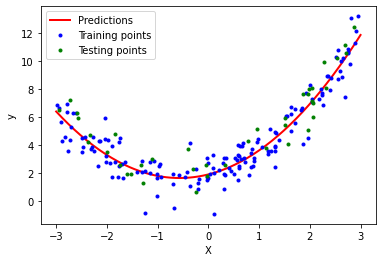

In [56]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

##### 7) Probar diferentes grados de polinomios
##### Egger, ahora te toca experimentar y comprobar el efecto de sobreajuste con un polinomio de alto orden.
##### Para ello, vamos a crear una función que aglutine y ejecute todos los pasos anteriores.

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
def polynomial_regression(degree):
    #Generamos los datos
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    # Veremos más adelante qué es una pipeline. Básicamente es una secuenciación de los pasos a ejecutar.
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    #Dibujamos el modelo predecido
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

##### 8) Llamamos a la función definida y le pasamos diferentes órdenes de polinomio.

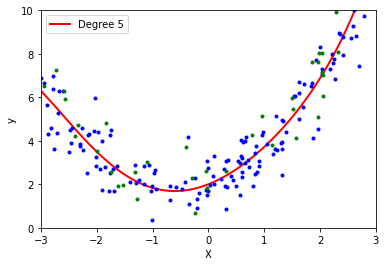

In [68]:
#Polinomio de grado 5. Modelo aceptable. No se aprecia infrajuste ni sobreajuste.
polynomial_regression(5)

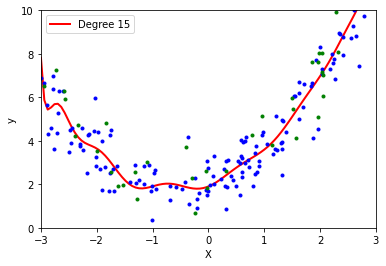

In [59]:
#Polinomio de grado 15. Comienza a verse sobreajuste
polynomial_regression(15)

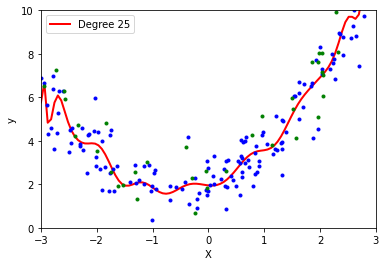

In [60]:
#Polinomio de grado 25. Modelo sobreajustado
polynomial_regression(25)